In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime as dt
import yfinance as yf
from pmdarima import auto_arima
from tabulate import tabulate
from math import sqrt

In [16]:
df = pd.read_csv('Stocks/GOOG.csv')
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-10,51.752499,52.422501,51.164501,51.977501,51.977501,36154000
2018-12-11,52.824501,53.029999,51.992001,52.587502,52.587502,27894000
2018-12-12,53.400002,54.082500,53.139500,53.183998,53.183998,30476000
2018-12-13,53.403500,53.987999,52.696499,53.095001,53.095001,26596000
2018-12-14,52.499001,53.130001,52.039501,52.105000,52.105000,33732000
...,...,...,...,...,...,...
2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19235100
2023-12-06,132.899994,133.309998,131.309998,131.429993,131.429993,16360600


([], [])

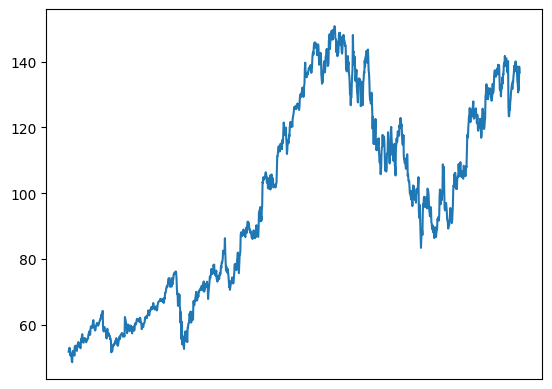

In [17]:
plt.plot(df.index, df['Adj Close'])
plt.xticks([])

In [10]:
# Train test split
to_row = int(len(df)*0.8)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])
testing_data

[124.349998,
 124.43,
 124.379997,
 125.790001,
 124.059998,
 123.849998,
 121.260002,
 123.870003,
 123.019997,
 119.089996,
 119.010002,
 121.080002,
 120.010002,
 120.970001,
 120.559998,
 122.629997,
 120.93,
 120.139999,
 116.870003,
 117.709999,
 119.620003,
 124.830002,
 125.699997,
 125.059998,
 124.080002,
 122.779999,
 119.529999,
 120.309998,
 121.879997,
 122.790001,
 129.660004,
 129.869995,
 133.009995,
 133.110001,
 131.889999,
 128.639999,
 128.770004,
 128.539993,
 131.940002,
 131.839996,
 130.149994,
 130.210007,
 130.169998,
 131.830002,
 130.270004,
 129.110001,
 130.460007,
 128.110001,
 128.929993,
 129.690002,
 133.210007,
 130.419998,
 130.690002,
 131.789993,
 135.490005,
 136.929993,
 137.350006,
 136.800003,
 136.710007,
 135.369995,
 136.199997,
 137.199997,
 137.740005,
 136.070007,
 137.5,
 138.990005,
 138.300003,
 138.960007,
 138.830002,
 134.589996,
 131.360001,
 131.25,
 132.169998,
 129.449997,
 131.460007,
 133.130005,
 131.850006,
 135.169998,
 13

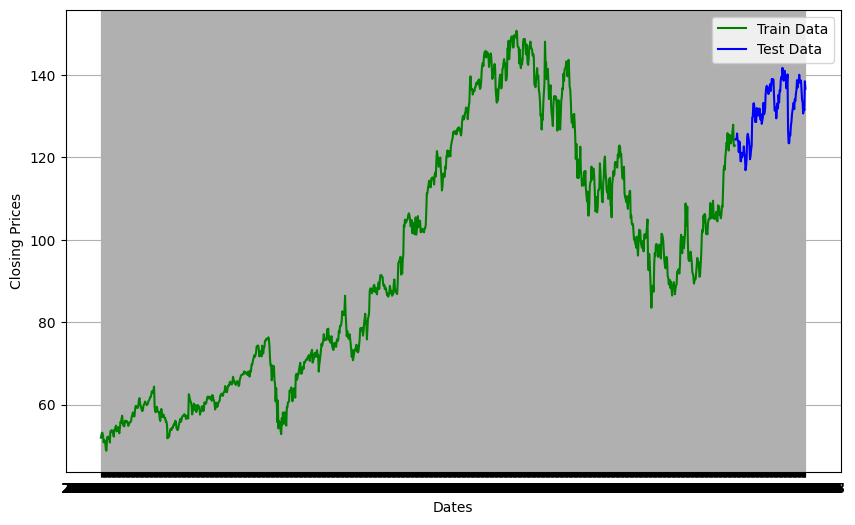

In [18]:
# Split plot
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green', label = 'Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label = 'Test Data')
plt.legend()

In [19]:
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(steps = 5)
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -2634.009
Date:                Sun, 10 Dec 2023   AIC                           5280.018
Time:                        13:50:41   BIC                           5310.837
Sample:                             0   HQIC                          5291.600
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6950      0.293      2.372      0.018       0.121       1.269
ar.L2          0.0251      0.034      0.741      0.459      -0.041       0.091
ar.L3         -0.0477      0.028     -1.701      0.089      -0.103       0.007
ar.L4          0.0131      0.037      0.355      0.723      -0.059       0.085
ma.L1         -0.7397      0.295     -2.504      0.012      -1.319      -0.161
sigma2         3.8692      0.090     42.904      0.000       3.692       4.046
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               956.76
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.94   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
df['Adj Close'].mean()

97.69735013343924

In [22]:
# Calculate performance metrics
mse = mean_squared_error(testing_data, model_predictions)
mae = mean_absolute_error(testing_data, model_predictions)
rmse = sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 5.353125999044587
Root Mean Squared Error: 2.313682346184235
Mean Absolute Error: 1.6376395425050025


In [24]:
# Combine lists into a list of pairs
combined_data = list(zip(testing_data, model_predictions))

# Print the table using tabulate
table = tabulate(combined_data, headers=['Testing Data', 'Model Predictions'], tablefmt='grid')
print(table)

+----------------+---------------------+
|   Testing Data |   Model Predictions |
+================+=====================+
|         124.35 |             123.033 |
+----------------+---------------------+
|         124.43 |             124.356 |
+----------------+---------------------+
|         124.38 |             124.444 |
+----------------+---------------------+
|         125.79 |             124.338 |
+----------------+---------------------+
|         124.06 |             125.699 |
+----------------+---------------------+
|         123.85 |             124.12  |
+----------------+---------------------+
|         121.26 |             123.816 |
+----------------+---------------------+
|         123.87 |             121.445 |
+----------------+---------------------+
|         123.02 |             123.794 |
+----------------+---------------------+
|         119.09 |             123.169 |
+----------------+---------------------+
|         119.01 |             119.255 |
+---------------

In [25]:
print(len(testing_data))
print(len(model_predictions))

126
126


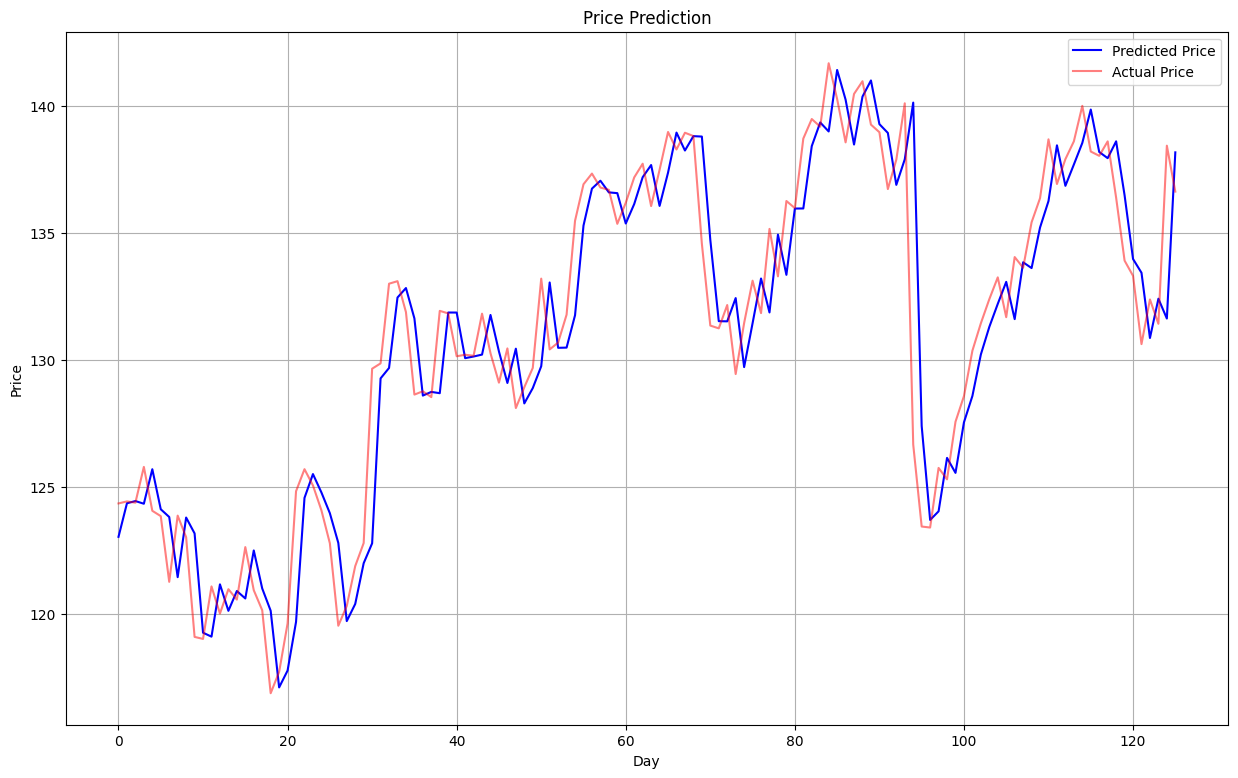

In [26]:
plt.figure(figsize = (15,9))
plt.grid(True)

date_range = df[to_row:].index
plt.plot( model_predictions, color = 'blue', linestyle = 'solid', label = 'Predicted Price')
plt.plot( testing_data, color = 'red', label = 'Actual Price', alpha = 0.5)

plt.title('Price Prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
model2 = ARIMA(df['Adj Close'], order = (4,1,1))
model2 = model2.fit()
model2.summary()

C:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1259
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -2635.886
Date:                Sun, 10 Dec 2023   AIC                           5283.773
Time:                        13:54:03   BIC                           5314.597
Sample:                             0   HQIC                          5295.357
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8276      0.173      4.790      0.000       0.489       1.166
ar.L2          0.0329      0.033      1.004      0.316      -0.031       0.097
ar.L3         -0.0473      0.030     -1.564      0.118      -0.106       0.012
ar.L4          0.0276      0.031      0.888      0.375      -0.033       0.089
ma.L1         -0.8743      0.174     -5.021      0.000      -1.216      -0.533
sigma2         3.8679      0.090     42.861      0.000       3.691       4.045
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               948.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.93   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
pred = model2.predict(start = len(df), end = len(df)+30,typ = 'levels').rename('Arima Predictions')
print(pred)

1259    136.776518
1260    136.471546
1261    136.502944
1262    136.462476
1263    136.448202
1264    136.425153
1265    136.408386
1266    136.393308
1267    136.380972
1268    136.370421
1269    136.361533
1270    136.353996
1271    136.347624
1272    136.342231
1273    136.337668
1274    136.333807
1275    136.330541
1276    136.327777
1277    136.325438
1278    136.323460
1279    136.321785
1280    136.320369
1281    136.319170
1282    136.318156
1283    136.317298
1284    136.316572
1285    136.315958
1286    136.315438
1287    136.314999
1288    136.314626
1289    136.314312
Name: Arima Predictions, dtype: float64


C:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\sharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


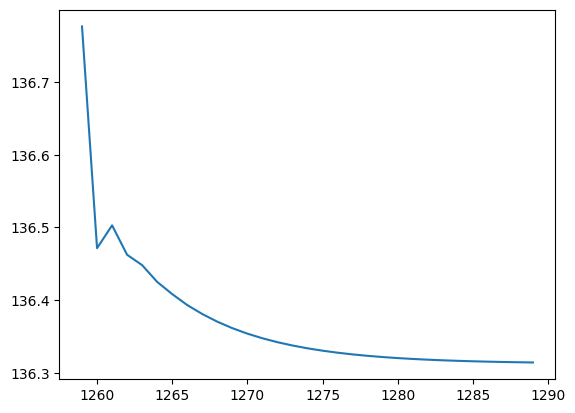

In [29]:
plt.plot(pred)